<a href="https://colab.research.google.com/github/Aish328/Machine-Learning-Projects/blob/main/DiseasePredictorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [ ]:
path = '/content/drive/MyDrive/DatasetforDiseasePredictor/Training.csv'
df = pd.read_csv(path).dropna(axis = 1)  # dropna: to remove nan values from data , nan values present in data effects the building of model badly


In [ ]:
count = df['prognosis'].value_counts()
count

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

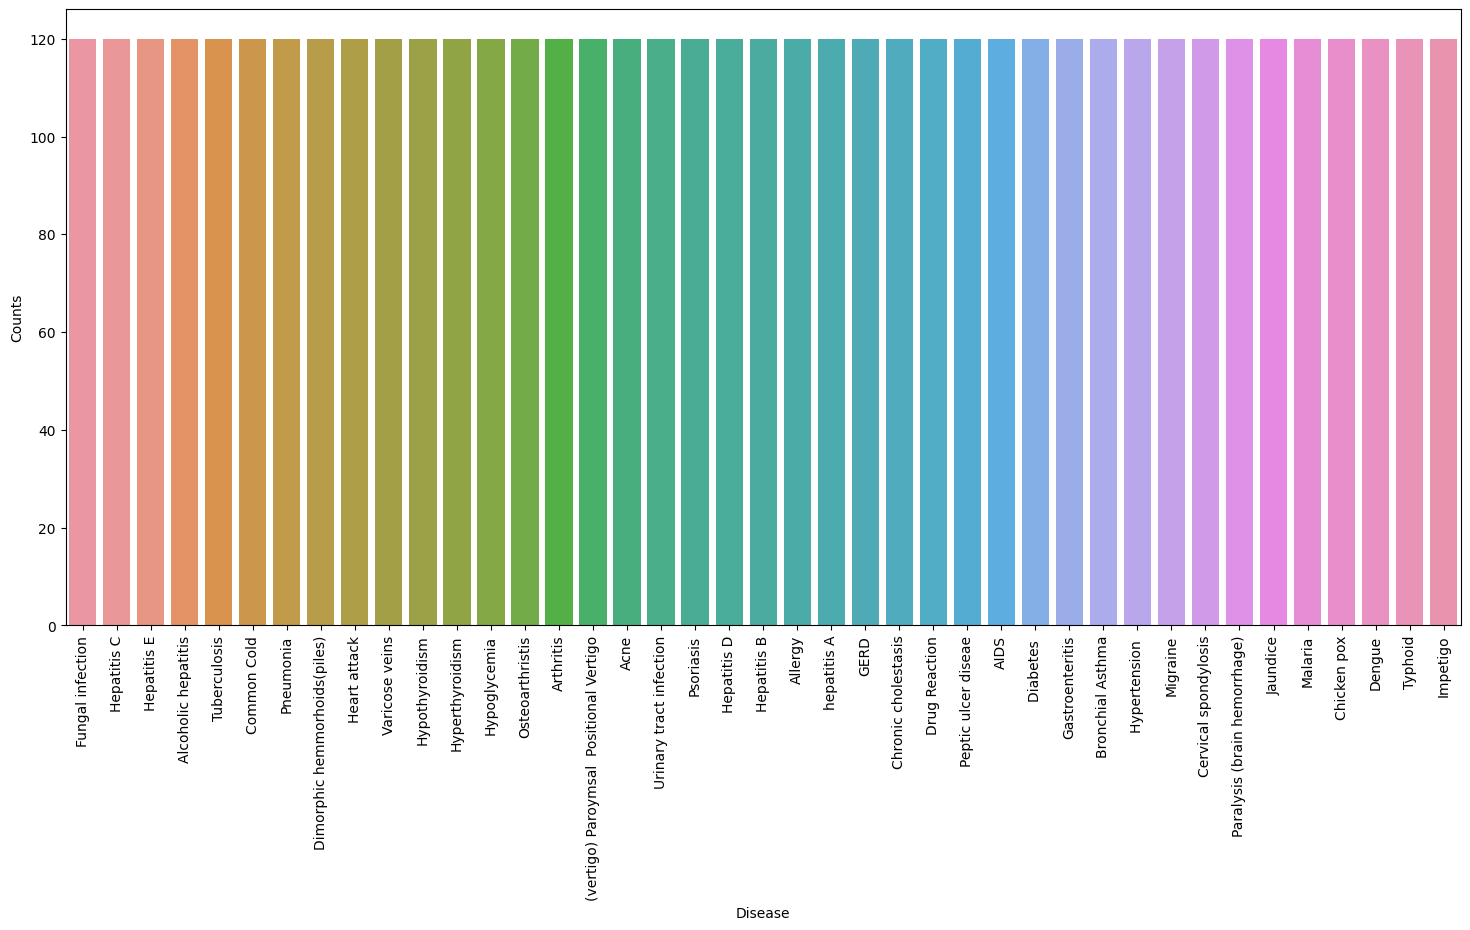

In [ ]:
frame= pd.DataFrame({
    "Disease": count.index,
    "Counts": count.values
    })
frame
# to plot in graphical and beautiful format:

plt.figure(figsize = (18,8)) # plot figure
sns.barplot(x = "Disease", y = "Counts", data = frame) # defining x axis annd y axis plots
plt.xticks(rotation=90) # to rotate labels of x axis to 90 degree to avoid overlapping used incases s labels are long names
plt.show() # show the plot


In [ ]:
#encoding the prognosis cuz it is the target column with object datatype which is not supported by ML hence label encoding is done to convert into numerical format
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")
print(y)

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)
0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64


In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(), #svm: support vector machine, SVC : supporrt vector  classifier
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [ ]:
#training of data by fitting nd checking by prediction on SVM model
svmModel = SVC()
svmModel.fit(X_train,y_train)
preds = svmModel.predict(X_test)
preds

array([ 7, 26, 11, 21, 40, 12, 14, 30,  0, 15, 17, 12, 20, 28,  7, 18,  2,
       35, 28,  8,  0, 18,  8,  9,  9,  8, 10, 38, 13, 17, 15, 34, 36, 23,
       15, 38,  7, 38,  8, 23,  6, 10, 33, 29, 11,  6, 24, 33,  1, 29,  7,
        5, 31, 26, 23, 26,  0, 18, 14, 28, 12, 22,  0,  6,  5, 23, 20, 26,
       18, 37,  5, 14,  2, 23, 32,  2, 15, 32, 37,  0,  1,  4, 32, 38,  6,
        1, 25, 38, 30, 19, 32, 14, 11, 39,  7, 15, 40, 19, 13, 31, 19,  0,
       11, 15, 27,  6, 18, 39,  7, 27,  6, 21, 35, 38,  6, 22, 11, 40, 19,
       10, 12, 26, 10, 26, 34,  6, 35, 20,  8, 14, 17, 39,  6, 10, 11, 37,
       30, 12,  8,  2,  5,  5, 14,  2, 13,  9, 30,  1, 30, 24, 36, 25, 37,
       34, 13, 39, 11, 13,  4,  9,  3, 29, 35,  9,  7, 36,  6,  4, 36, 15,
       30, 13, 31,  1,  9, 10, 17, 32, 16, 38, 32, 20,  6, 28, 19,  1, 14,
       35, 35, 12,  1, 13,  4, 16, 19, 38, 31, 25, 16, 25, 31,  4, 21, 16,
       31, 21, 24, 33, 35, 23,  9, 40, 11, 36, 10, 23,  7, 26, 27,  7,  0,
       13, 26, 39, 12, 27

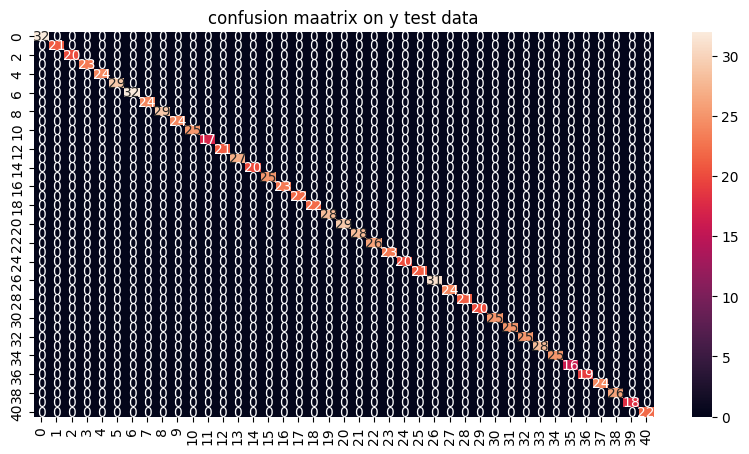

In [ ]:
confMatrix = confusion_matrix(y_test,preds)   # defining condusion matrix for test data here stored in ytest and predictions made by train on x data by model fitting by svm
plt.figure(figsize = (10,5))  # initiating the figure
sns.heatmap(confMatrix , annot = True)   # annot = true: provides the entire matrix accept the defined values with true as 0
plt.title("confusion maatrix on y test data")
plt.show()



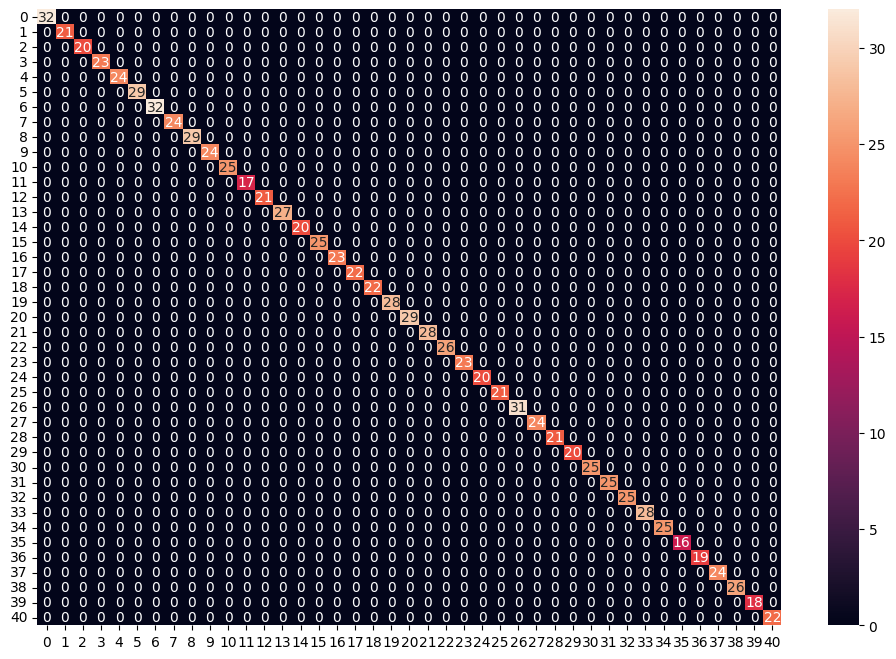

In [ ]:
# training and testing on bayes model using Gaussian Nb
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)
pred = nbmodel.predict(X_test)

cf = confusion_matrix(y_test, pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf, annot=True)
plt.show()


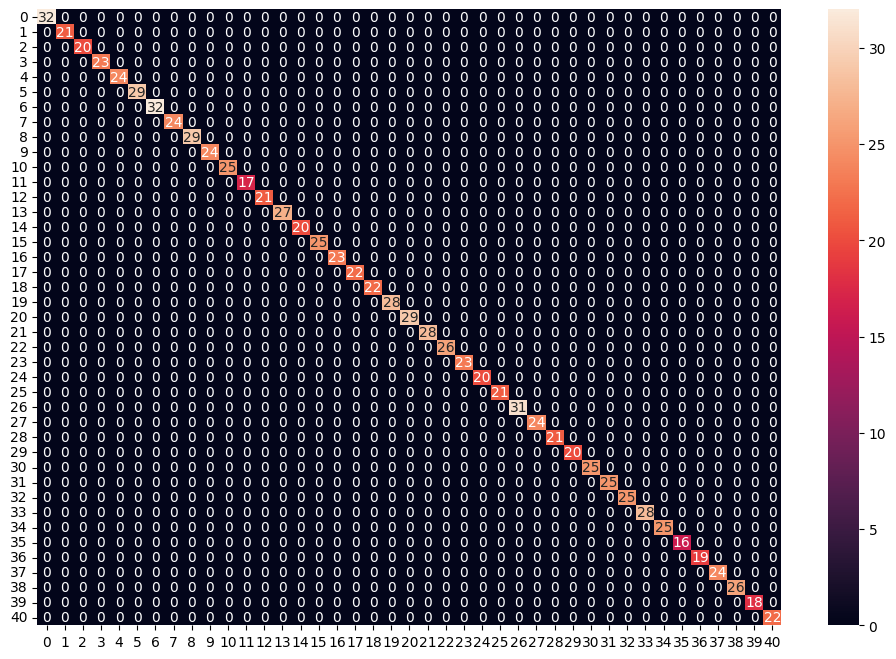

In [ ]:
#training and testing on random forest model
rfmodel= RandomForestClassifier()
rfmodel.fit(X_train, y_train)
pred= rfmodel.predict(X_test)

conf= confusion_matrix(y_test, pred)
plt.figure(figsize=(12,8))
sns.heatmap(conf, annot= True)
plt.show()


In [ ]:
#initialising final models
finalSVM = SVC()
finalGNB= GaussianNB()
finalrf = RandomForestClassifier()

# fitting data in all models:
finalSVM.fit(X,y)
finalGNB.fit(X,y)
finalrf.fit(X,y)
# definig into subsets:
Test_data= pd.read_csv('/content/drive/MyDrive/DatasetforDiseasePredictor/Testing.csv')
testX = Test_data.iloc[:,:-1]
testY = Test_data.iloc[:,-1]

#predict alll datasets
predSVM = finalSVM.predict(testX)
predGNB= finalGNB.predict(testX)
predrf= finalrf.predict(testX)
final_preds = [mode([i, j, k]) for i, j, k in zip(predSVM, predGNB, predrf)]
final_preds
#final prediction:
#final_preds= [mode([i[0], j[0], k[0]]) for i, j ,k in zip(predSVM,predGNB, predrf)]
#final_preds

[ModeResult(mode=15, count=3),
 ModeResult(mode=4, count=3),
 ModeResult(mode=16, count=3),
 ModeResult(mode=9, count=3),
 ModeResult(mode=14, count=3),
 ModeResult(mode=33, count=3),
 ModeResult(mode=1, count=3),
 ModeResult(mode=12, count=3),
 ModeResult(mode=17, count=3),
 ModeResult(mode=6, count=3),
 ModeResult(mode=23, count=3),
 ModeResult(mode=30, count=3),
 ModeResult(mode=7, count=3),
 ModeResult(mode=32, count=3),
 ModeResult(mode=28, count=3),
 ModeResult(mode=29, count=3),
 ModeResult(mode=8, count=3),
 ModeResult(mode=11, count=3),
 ModeResult(mode=37, count=3),
 ModeResult(mode=40, count=3),
 ModeResult(mode=19, count=3),
 ModeResult(mode=20, count=3),
 ModeResult(mode=21, count=3),
 ModeResult(mode=22, count=3),
 ModeResult(mode=3, count=3),
 ModeResult(mode=36, count=3),
 ModeResult(mode=10, count=3),
 ModeResult(mode=34, count=3),
 ModeResult(mode=13, count=3),
 ModeResult(mode=18, count=3),
 ModeResult(mode=39, count=3),
 ModeResult(mode=26, count=3),
 ModeResult(mod

In [ ]:
#cf = confusion_matrix(testY, final_preds)

In [ ]:
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [ ]:
# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][finalrf.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][finalGNB.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][finalSVM.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    #final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    # Calculate the mode using np.unique
    data = [rf_prediction, nb_prediction, svm_prediction]
    values, counts = np.unique(data, return_counts=True)
    mode_index = np.argmax(counts)
    mode = values[mode_index]
    final_prediction = mode
    #final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
